In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv(r'C:\Users\Kashi\Downloads\crime_data.csv')


In [23]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [24]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [38]:
df = df.rename(columns = {'Unnamed: 0': 'States'})
df1 = df.copy()
df2 = df.copy()

In [26]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# HC


In [27]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df[['Murder', 'Assault', 'UrbanPop', 'Rape']] = ms.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [28]:
df_norm = df.iloc[:,1:]

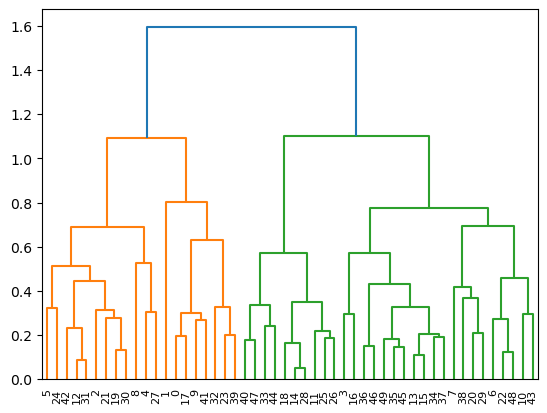

In [29]:
# create dendrogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.show()

In [73]:
# create clusters
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [74]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [75]:
yhc = hc.fit_predict(df_norm)

In [76]:
yhc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [77]:
df1['Clusters']=yhc
df1

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [78]:
 df1.sort_values('Clusters')


,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [79]:
df1[['States', 'Clusters']]

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,1
8,Florida,0
9,Georgia,0


In [80]:
silhouette_score(df1.iloc[:,1:],df1["Clusters"])

0.30405286419771016

# KMEANS 


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Murder', 'Assault', 'UrbanPop', 'Rape']] = sc.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [43]:
from sklearn.cluster import KMeans

In [44]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.iloc[:,1:])
  wcss.append(kmeans.inertia_)

C:\Users\Kashi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 50.571058842074564,
 43.84066880397914,
 41.091533230364156,
 35.400181290545675,
 30.87014794533627,
 28.14279820003399]

<AxesSubplot:>

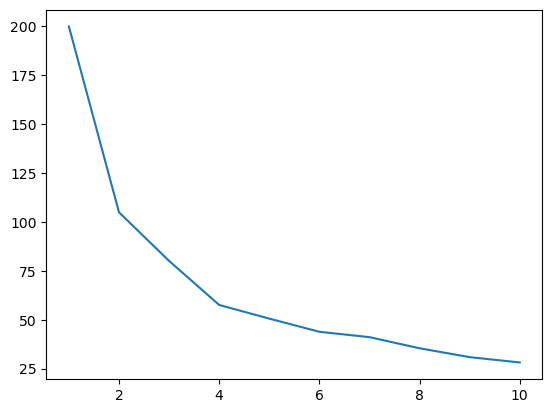

In [46]:
sns.lineplot(x=range(1,11),y=wcss)

In [47]:
from sklearn.metrics import silhouette_score

In [87]:
kmeans = KMeans(n_clusters=4)
predict=kmeans.fit_predict(df.iloc[:,1:])

In [88]:
predict

array([1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0,
       2, 1, 3, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 3])

In [89]:
df2['ClusterID'] = kmeans.labels_
df2

,States,Murder,Assault,UrbanPop,Rape,ClusterID
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,1


In [90]:
kmeans.cluster_centers_

array([[ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [-0.44878894, -0.35858791,  0.56576856, -0.20455729]])

In [91]:
 df2.groupby("ClusterID").mean().reset_index()


,ClusterID,Murder,Assault,UrbanPop,Rape
0,0,10.966667,264.000000,76.500000,33.608333
1,1,13.937500,243.625000,53.750000,21.412500
2,2,3.600000,78.538462,52.076923,12.176923
3,3,5.852941,141.176471,73.647059,19.335294


In [92]:
silhouette_score(df2.iloc[:,1:],df2["ClusterID"])

0.233543458343292

# DBSCAN

In [54]:
from sklearn.cluster import DBSCAN
df4 = df.drop(['States'], axis =1)
df4.iloc[:,:]=sc.fit_transform(df4.iloc[:,:])
df4.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [100]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=9)

nbrs = nn.fit(df4)

distances,indices = nbrs.kneighbors(df4)

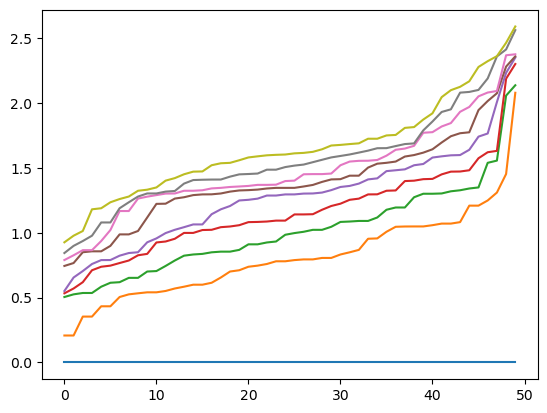

In [101]:
distances = np.sort(distances,axis=0)
#distances = distances[:,1]
plt.plot(distances)
plt.show()

In [102]:
distances

array([[0.        , 0.2079438 , 0.50466926, 0.53326883, 0.55122406,
        0.74412537, 0.78963622, 0.8436743 , 0.92635696],
       [0.        , 0.2079438 , 0.52515083, 0.57035779, 0.65497312,
        0.7665773 , 0.82632706, 0.89891283, 0.97730326],
       [0.        , 0.35377437, 0.53571007, 0.61894533, 0.70471473,
        0.84983119, 0.86574406, 0.93622983, 1.01352957],
       [0.        , 0.35377437, 0.53571007, 0.71097658, 0.75913104,
        0.85691828, 0.86574406, 0.97730326, 1.1806558 ],
       [0.        , 0.43312429, 0.58411812, 0.73797792, 0.78923123,
        0.85691828, 0.93622983, 1.07930805, 1.18887236],
       [0.        , 0.43312429, 0.61451768, 0.74649625, 0.78963622,
        0.89891283, 1.02092207, 1.07930805, 1.23494333],
       [0.        , 0.50466926, 0.61894533, 0.7665773 , 0.82328154,
        0.98736234, 1.16740116, 1.18887236, 1.25988869],
       [0.        , 0.52515083, 0.65227142, 0.78602982, 0.8436743 ,
        0.98736234, 1.16740116, 1.23494333, 1.27911926],


In [103]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit_predict(df4)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [104]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [106]:
df4['cluster']=dbscan.labels_
df4.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,-1
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,-1
3,0.234708,0.233212,-1.084492,-0.186794,-1
4,0.281093,1.275635,1.776781,2.088814,-1


In [107]:

silhouette_score(df4,df4["cluster"])

0.14739697387652634